## Import data

In [1]:
%matplotlib notebook


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import copy
from sklearn import cluster



In [2]:
df = pd.read_csv('compsci361\BanknoteData.csv')
#test = pd.read_csv('compsci361\BanknoteSample.csv')

In [3]:
#np.array(df.head())
df.head()[['V1','V2','V3','V4']]

,V1,V2,V3,V4
0,-5.90380,-0.82199,-4.85540,10.98180
1,-2.96750,0.75429,4.09480,2.36890
2,1.03250,-0.41337,1.32640,5.65660
3,0.32477,-0.36036,-0.41645,-0.33617
4,2.88240,-2.37240,-1.97250,-2.30860


## Normalization

In [4]:

from sklearn.preprocessing import StandardScaler, RobustScaler
# Standardizing the features

x = np.array(df[['V1','V2','V3','V4']])
X =  RobustScaler().fit_transform(x)

In [5]:
df_norm = pd.DataFrame(data = X, columns=['V1','V2','V3','V4'])
type(df_norm)

pandas.core.frame.DataFrame

## Define plot function

In [6]:
import matplotlib.pyplot as plt
from sklearn import cluster
#%matplotlib inline

# Plot clustering output on a dataset 2D
def cluster_plots(set1,attr1='principal component 1',attr2='principal component 2', colours1 = 'gray', title1 = 'Dataset 1'):
    %matplotlib inline
    fig = plt.figure()
    plt.axes()
    plt.scatter(set1[attr1], set1[attr2], c=colours1, alpha=0.5)
    plt.title(title1)
    plt.show()


# Plot clustering output on a dataset 3D

from mpl_toolkits.mplot3d import Axes3D

def cluster_plots_3D(data_set,az,el,attr1='principal component 1',attr2='principal component 2',attr3='principal component 3',col='B'):
   
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = data_set[attr1]
    y = data_set[attr2]
    z = data_set[attr3]
    ax.scatter(x, y, z, c = col, marker='o')
    ax.view_init(az,el) # Angle of plot
    ax.set_xlabel("1")
    ax.set_ylabel("2")
    ax.set_zlabel("3")
    plt.show()


## PCA dimension reduction

In [44]:
# 3D PCA
pca = PCA(n_components=3)
principalComponents= pca.fit(df_norm[['V1','V3','V4']])
print(pca.components_)

pca.components_ = pca.components_[1:,:]
df_2D = pca.transform(df[['V1','V3','V4']])
#pca.components_
df_2D

[[-0.54947896 -0.27029999  0.79057624]
 [ 0.28104198 -0.95088068 -0.12977418]
 [ 0.78682163  0.15087693  0.59845457]]


array([[ 1.55403218,  1.13472112],
       [-5.0135845 , -0.35898519],
       [-1.68365705,  4.33815271],
       ...,
       [-4.98021745, -0.03717104],
       [-1.82852567,  2.04893306],
       [-5.67935496, -0.45832828]])

<class 'numpy.ndarray'>


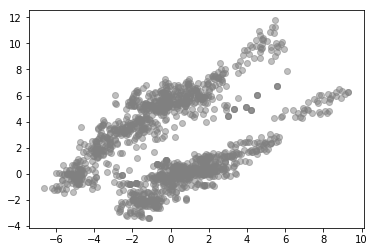

In [8]:
print(type(np.array(df_2D[:,0])))
#plt.figure()
#cluster_plots(principalDf,'principal component 1','principal component 2', colours1 = 'gray', title1 = 'Dataset 1')
%matplotlib inline

plt.scatter(np.array(df_2D[:,0]), np.array(df_2D[:, 1]), c='gray', alpha=0.5)

plt.show()

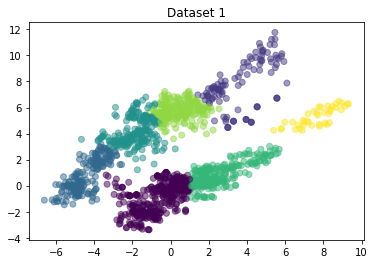

[0 1 1 ... 1 1 1]


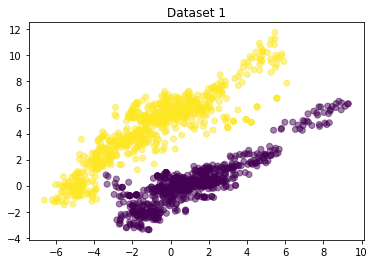

In [38]:

df_2D_df = pd.DataFrame(df_2D, columns = ['principal component 1', 'principal component 2'])
df_2D_df
#df_2D = pd.DataFrame(df_2D,columns=['principal component 1','principal component 2'])
from sklearn import cluster

hc_alg = cluster.AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hc_dataset1 = hc_alg.fit_predict(df_2D_df)

%matplotlib inline

plt.figure()
cluster_plots(df_2D_df,colours1=hc_dataset1)
type(df_2D)


for i in range(len(hc_dataset1)):
    if hc_dataset1[i] in [0,6,4]: # 1,2,3,5,6
        #print(DBSCAN_pre[i])
        hc_dataset1[i] = 0
    else:
        hc_dataset1[i] = 1
print(hc_dataset1)
cluster_plots(df_2D_df,colours1=hc_dataset1)

data = {'ID':df['ID']}
result = pd.DataFrame(data)
result['Class'] = [1-i for i in hc_dataset1]
#result.to_csv('result%s.csv'%10) #0.6,10



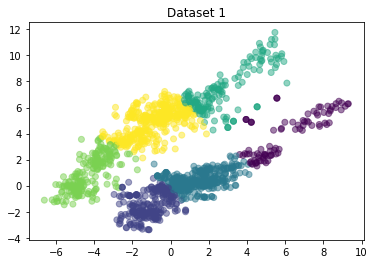

[0 1 1 ... 1 1 1]


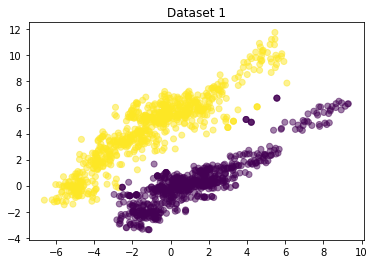

In [42]:
n_its = 300
df_2D_df = pd.DataFrame(df_2D, columns = ['principal component 1', 'principal component 2'])
df_2D_df
#df_2D = pd.DataFrame(df_2D,columns=['principal component 1','principal component 2'])
from sklearn import cluster

k_means_alg = cluster. KMeans(n_clusters=6,max_iter=n_its,n_init=1,init="random",random_state=100)
km_dataset1 = k_means_alg.fit_predict(df_2D_df)

%matplotlib inline

plt.figure()
cluster_plots(df_2D_df,colours1=km_dataset1)
type(df_2D)


for i in range(len(km_dataset1)):
    if km_dataset1[i] in [0,2,1]: # 1,3,4,5,6
        #print(DBSCAN_pre[i])
        km_dataset1[i] = 0
    else:
        km_dataset1[i] = 1
print(km_dataset1)
cluster_plots(df_2D_df,colours1=km_dataset1)

data = {'ID':df['ID']}
result = pd.DataFrame(data)
result['Class'] = [1-i for i in km_dataset1]

#result.to_csv('result%s.csv'%11) 



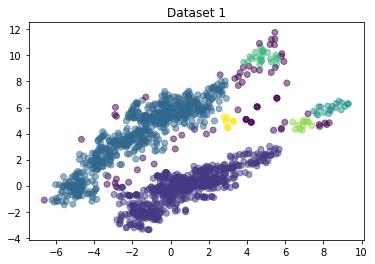

Cluster -4: 0
Cluster -3: 0
Cluster -2: 0
Cluster -1: 67
Cluster 0: 594
Cluster 1: 649
Cluster 2: 19
Cluster 3: 22
Cluster 4: 11
Cluster 5: 10
Cluster 6: 0
Cluster 7: 0
Cluster 8: 0
Cluster 9: 0
Cluster 10: 0
Cluster 11: 0
[0 1 1 ... 1 1 1]


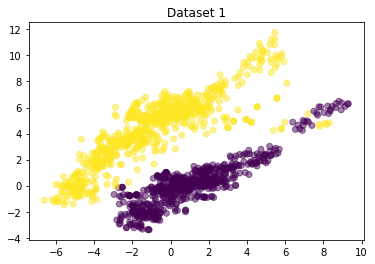

In [45]:
# DBSCAN
DBSCAN_alg = cluster.DBSCAN(eps=0.6, min_samples=10, metric='euclidean')
DBSCAN_pre = DBSCAN_alg.fit_predict(df_2D_df)

# plot
cluster_plots(df_2D_df,colours1=DBSCAN_pre)
print(*["Cluster "+str(i)+": "+ str(sum(DBSCAN_pre==i)) for i in range(-4,12)], sep='\n')
DBSCAN_pre


# combine together
for i in range(len(DBSCAN_pre)):
    if DBSCAN_pre[i] in [0,2,4]: # 1 -1 3 5
        #print(DBSCAN_pre[i])
        DBSCAN_pre[i] = 0
    else:
        DBSCAN_pre[i] = 1
print(DBSCAN_pre)
cluster_plots(df_2D_df,colours1=DBSCAN_pre)
    
    
data = {'ID':df['ID']}
result = pd.DataFrame(data)
result['Class'] = [1-i for i in DBSCAN_pre]
result.to_csv('result%s.csv'%9) #0.6,10



# 4-1 right up corner
# 2-middle two points

# 0 purple
# -1 light purple




In [ ]:
print(*["Cluster "+str(i)+": "+ str(sum(DBSCAN_pre==i)) for i in range(-4,12)], sep='\n')

In [ ]:
print(DBSCAN_pre)

In [ ]:
# combine together

for i in range(len(DBSCAN_pre)):
    if DBSCAN_pre[i] in [-1,0,2]:
        #print(DBSCAN_pre[i])
        DBSCAN_pre[i] = 0
    else:
        DBSCAN_pre[i] = 1
#print([str(i) for i in DBSCAN_pre])
cluster_plots(df_2D_df,colours1=DBSCAN_pre)
    
    
data = {'ID':df['ID']}
result = pd.DataFrame(data)
result['Class'] = DBSCAN_pre
#result.to_csv('result%s.csv'%7)

## Plot 2D graph

In [ ]:
cluster_plots(df,'V1','V2')
cluster_plots(df,'V1','V3')
cluster_plots(df,'V1','V4')
cluster_plots(df,'V2','V3')
cluster_plots(df,'V2','V4')
cluster_plots(df,'V3','V4')